<a href="https://colab.research.google.com/github/diegomera1/ActividadesIA/blob/main/Actividad4_DiegoMera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio de regresión logística
Realizar un modelo que con los datos de entrenamiento que son de usuarios y su navegabilidad en un sitio web, para que los clasifique si son de windows, MacOS o Linux:

Nuestra información de entrada son 4 características que tomé de una web que utiliza Google Analytics y son:

Duración de la visita en Segundos
Cantidad de Páginas Vistas durante la Sesión
Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)
Los valores de las etiquetas son:

0 - Windows
1 - Macintosh
2 - Linux


**1. Importar paquetes**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

2. Leemos el archivo csv

In [2]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


3. Vemos información estadística

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


4. Revisamos la cantidad de tipos de usuarios que tenemos en los datos

In [4]:

print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


5. Revisamos información acerca de nuestros datos

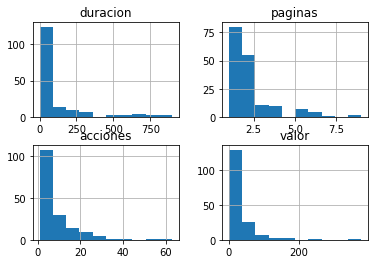

In [5]:
dataframe.drop(['clase'], axis = 1).hist()
plt.show()
     

6. Revisamos las dimensiones de nuestros datos

In [6]:
x = np.array(dataframe.drop(['clase'], axis = 1))
y = np.array(dataframe['clase'])
x.shape

(170, 4)

7. Creamos nuestro modelo

In [8]:
model = LogisticRegression(solver = 'liblinear', max_iter = 100)
model.fit(x, y)

LogisticRegression(
    C = 1.0, 
    class_weight = None, 
    dual = False, 
    fit_intercept = True, 
    intercept_scaling = 1, 
    max_iter = 100, 
    multi_class = 'ovr', 
    n_jobs = 1, 
    penalty = 'l2', 
    random_state = None, 
    solver = 'liblinear', 
    tol = 0.0001, 
    verbose = 0, 
    warm_start = False
)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

7. Una vez copilado los datos hacemos clasificar el conjunto de datos de entradas X utilizando predict.

In [9]:
predictions = model.predict(x)
print(predictions[0:5])

[2 2 2 2 2]


8. Revisamos que tan bueno es nuestro modelo

In [10]:
model.score(x, y)
     

0.7764705882352941

8. Comenzamos a validar nuestro modelo

In [11]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [12]:

name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.742308 (0.135737)


9. Puntación de predicción

In [13]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


10. Reporte de resultados

In [14]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [15]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [16]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [2], 'acciones': [18], 'valor': [54]})
model.predict(X_new)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])